In [2]:
'''
Predict US house prices

1. 데이터를 읽고, 기술통계 등 EDA과정 수행\

2. 결측치 처리(결측치가 많은 열은 제거, 적은 열은 대체값으로 대체)

3. saleprice를 시각화(선 그래프,log1p)
 x축:saleprice, y축:frequency
  => 종속변수(y, 예상가격)는 정규분포를 따르도록 해야만 예측 결과에 대한 성능이 오르게 된다.(회귀모델 등 경우)
    랜덤포레스트같은 decision tree는 상관 없음. 거의 차이 안나.
선형회귀분석 
- 선형성, 독립성, 정규성(saleprice), 등분산성이 모두 만족이 되어야 성능이 좋은 회귀모델을 만들 수 있다.

4. 상관계수
'''

'\nPredict US house prices\n\n1. 데이터를 읽고, 기술통계 등 EDA과정 수행\n2. 결측치 처리(결측치가 많은 열은 제거, 적은 열은 대체값으로 대체)\n\n3. saleprice를 시각화(선 그래프,log1p)\n x축:saleprice, y축:frequency\n  => 종속변수(y, 예상가격)는 정규분포를 따르도록 해야만 예측 결과에 대한 성능이 오르게 된다.(회귀모델 등 경우)\n    랜덤포레스트같은 decision tree는 상관 없음. 거의 차이 안나.\n선형회귀분석 \n- 선형성, 독립성, 정규성(saleprice), 등분산성이 모두 만족이 되어야 성능이 좋은 회귀모델을 만들 수 있다.\n\n4. 상관계수\n'

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# null이 있는 것만 출력
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
train = train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)
test = test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [ ]:
sns.pairplot(train.rev_cols)

In [15]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
'''
 0   Id             1460 non-null   int64     Categorical / Nominal
 1   MSSubClass     1460 non-null   int64     Categorical / Nominal
 2   MSZoning       1460 non-null   object    Categorical / Nominal
 3   LotFrontage    1201 non-null   float64   Numeric / Continuous
 4   LotArea        1460 non-null   int64     Numeric / Continuous
 5   Street         1460 non-null   object    Categoric / Nominal
 6   LotShape       1460 non-null   object    Categorical / Ordinal
 7   LandContour    1460 non-null   object    Categorical / Ordinal
 8   Utilities      1460 non-null   object    Categorical / Ordinal
 9   LotConfig      1460 non-null   object    Categorical / Nominal
 10  LandSlope      1460 non-null   object    Categorical / Ordinal
 11  Neighborhood   1460 non-null   object    Categorical / Nominal
 12  Condition1     1460 non-null   object    Categorical / Nominal
 13  Condition2     1460 non-null   object    Categorical / Nominal
 14  BldgType       1460 non-null   object    Categorical / Ordinal
 15  HouseStyle     1460 non-null   object    Categorical / Ordinal
 16  OverallQual    1460 non-null   int64     Numeric / Discrete
 17  OverallCond    1460 non-null   int64     Categorical / Ordinal
 18  YearBuilt      1460 non-null   int64     Numeric / Discrete
 19  YearRemodAdd   1460 non-null   int64     Numeric / Discrete
 20  RoofStyle      1460 non-null   object    Categoric / Nominal
 21  RoofMatl       1460 non-null   object    Categoric / Nominal
 22  Exterior1st    1460 non-null   object    Categoric / Nominal
 23  Exterior2nd    1460 non-null   object    Categoric / Nominal
 24  MasVnrType     1452 non-null   object    Categoric / Nominal
 25  MasVnrArea     1452 non-null   float64   Numeric / Continuous
 26  ExterQual      1460 non-null   object    Categorical / Ordinal
 27  ExterCond      1460 non-null   object    Categorical / Ordinal
 28  Foundation     1460 non-null   object    Categoric / Nominal
 29  BsmtQual       1423 non-null   object    Categorical / Ordinal
 30  BsmtCond       1423 non-null   object    Categorical / Ordinal
 31  BsmtExposure   1422 non-null   object    Categorical / Ordinal
 32  BsmtFinType1   1423 non-null   object    Categorical / Ordinal
 33  BsmtFinSF1     1460 non-null   int64     Numeric / Continuous
 34  BsmtFinType2   1422 non-null   object    Categorical / Ordinal
 35  BsmtFinSF2     1460 non-null   int64     Numeric / Continuous
 36  BsmtUnfSF      1460 non-null   int64     Numeric / Continuous
 37  TotalBsmtSF    1460 non-null   int64     Numeric / Continuous
 38  Heating        1460 non-null   object    Categoric / Nominal
 39  HeatingQC      1460 non-null   object    Categorical / Ordinal
 40  CentralAir     1460 non-null   object    Categoric / Nominal
 41  Electrical     1459 non-null   object    Categoric / Nominal
 42  1stFlrSF       1460 non-null   int64     Numeric / Continuous
 43  2ndFlrSF       1460 non-null   int64     Numeric / Continuous
 44  LowQualFinSF   1460 non-null   int64     Numeric / Continuous
 45  GrLivArea      1460 non-null   int64     Numeric / Continuous
 46  BsmtFullBath   1460 non-null   int64     Categoric / Nominal
 47  BsmtHalfBath   1460 non-null   int64     Categoric / Nominal
 48  FullBath       1460 non-null   int64     Categorical / Ordinal
 49  HalfBath       1460 non-null   int64     Categorical / Ordinal
 50  BedroomAbvGr   1460 non-null   int64     Categorical / Ordinal
 51  KitchenAbvGr   1460 non-null   int64     Categorical / Ordinal
 52  KitchenQual    1460 non-null   object    Categorical / Ordinal
 53  TotRmsAbvGrd   1460 non-null   int64     Categorical / Ordinal
 54  Functional     1460 non-null   object    Categorical / Ordinal
 55  Fireplaces     1460 non-null   int64     Numeric / Discrete
 56  GarageType     1379 non-null   object    Categoric / Nominal
 57  GarageYrBlt    1379 non-null   float64   Numeric / Discrete
 58  GarageFinish   1379 non-null   object    Categorical / Ordinal
 59  GarageCars     1460 non-null   int64     Numeric / Discrete
 60  GarageArea     1460 non-null   int64     Numeric / Continuous
 61  GarageQual     1379 non-null   object    Categorical / Ordinal
 62  GarageCond     1379 non-null   object    Categorical / Ordinal
 63  PavedDrive     1460 non-null   object    Numeric / Discrete
 64  WoodDeckSF     1460 non-null   int64     Numeric / Continuous
 65  OpenPorchSF    1460 non-null   int64     Numeric / Continuous
 66  EnclosedPorch  1460 non-null   int64     Numeric / Continuous
 67  3SsnPorch      1460 non-null   int64     Numeric / Continuous
 68  ScreenPorch    1460 non-null   int64     Numeric / Continuous
 69  PoolArea       1460 non-null   int64     Numeric / Continuous
 70  MiscVal        1460 non-null   int64     Numeric / Continuous
 71  MoSold         1460 non-null   int64     Categoric / Nominal
 72  YrSold         1460 non-null   int64     Categoric / Nominal
 73  SaleType       1460 non-null   object    Categoric / Nominal
 74  SaleCondition  1460 non-null   object    Categoric / Nominal
 75  SalePrice      1460 non-null   int64     Numeric / Continuous

'''

In [ ]:
'''
ID 제외

Categorical / Nominal - 23개

 1   MSSubClass     1460 non-null   int64     Categoric / Nominal
 2   MSZoning       1460 non-null   object    Categoric / Nominal
 5   Street         1460 non-null   object    Categoric / Nominal
 9   LotConfig      1460 non-null   object    Categoric / Nominal
 11  Neighborhood   1460 non-null   object    Categoric / Nominal
 12  Condition1     1460 non-null   object    Categoric / Nominal
 13  Condition2     1460 non-null   object    Categoric / Nominal
 20  RoofStyle      1460 non-null   object    Categoric / Nominal
 21  RoofMatl       1460 non-null   object    Categoric / Nominal
 22  Exterior1st    1460 non-null   object    Categoric / Nominal
 23  Exterior2nd    1460 non-null   object    Categoric / Nominal
 24  MasVnrType     1452 non-null   object    Categoric / Nominal
 28  Foundation     1460 non-null   object    Categoric / Nominal
 38  Heating        1460 non-null   object    Categoric / Nominal
 40  CentralAir     1460 non-null   object    Categoric / Nominal
 41  Electrical     1459 non-null   object    Categoric / Nominal
 46  BsmtFullBath   1460 non-null   int64     Categoric / Nominal
 47  BsmtHalfBath   1460 non-null   int64     Categoric / Nominal
 56  GarageType     1379 non-null   object    Categoric / Nominal
 71  MoSold         1460 non-null   int64     Categoric / Nominal
 72  YrSold         1460 non-null   int64     Categoric / Nominal
 73  SaleType       1460 non-null   object    Categoric / Nominal
 74  SaleCondition  1460 non-null   object    Categoric / Nominal


Categorical / Ordinal - 25개

 6   LotShape       1460 non-null   object    Categorical / Ordinal
 7   LandContour    1460 non-null   object    Categorical / Ordinal
 8   Utilities      1460 non-null   object    Categorical / Ordinal
 10  LandSlope      1460 non-null   object    Categorical / Ordinal
 14  BldgType       1460 non-null   object    Categorical / Ordinal
 15  HouseStyle     1460 non-null   object    Categorical / Ordinal
 17  OverallCond    1460 non-null   int64     Categorical / Ordinal
 26  ExterQual      1460 non-null   object    Categorical / Ordinal
 27  ExterCond      1460 non-null   object    Categorical / Ordinal
 29  BsmtQual       1423 non-null   object    Categorical / Ordinal
 30  BsmtCond       1423 non-null   object    Categorical / Ordinal
 31  BsmtExposure   1422 non-null   object    Categorical / Ordinal
 32  BsmtFinType1   1423 non-null   object    Categorical / Ordinal
 34  BsmtFinType2   1422 non-null   object    Categorical / Ordinal
 39  HeatingQC      1460 non-null   object    Categorical / Ordinal
 48  FullBath       1460 non-null   int64     Categorical / Ordinal
 49  HalfBath       1460 non-null   int64     Categorical / Ordinal
 50  BedroomAbvGr   1460 non-null   int64     Categorical / Ordinal
 51  KitchenAbvGr   1460 non-null   int64     Categorical / Ordinal
 52  KitchenQual    1460 non-null   object    Categorical / Ordinal
 53  TotRmsAbvGrd   1460 non-null   int64     Categorical / Ordinal
 54  Functional     1460 non-null   object    Categorical / Ordinal
 58  GarageFinish   1379 non-null   object    Categorical / Ordinal
 61  GarageQual     1379 non-null   object    Categorical / Ordinal
 62  GarageCond     1379 non-null   object    Categorical / Ordinal
 63  PavedDrive     1460 non-null   object    Categorical / Ordinal

Numeric / Continuous - 20개

 3   LotFrontage    1201 non-null   float64   Numeric / Continuous
 4   LotArea        1460 non-null   int64     Numeric / Continuous
 25  MasVnrArea     1452 non-null   float64   Numeric / Continuous
 33  BsmtFinSF1     1460 non-null   int64     Numeric / Continuous
 35  BsmtFinSF2     1460 non-null   int64     Numeric / Continuous
 36  BsmtUnfSF      1460 non-null   int64     Numeric / Continuous
 37  TotalBsmtSF    1460 non-null   int64     Numeric / Continuous
 42  1stFlrSF       1460 non-null   int64     Numeric / Continuous
 43  2ndFlrSF       1460 non-null   int64     Numeric / Continuous
 44  LowQualFinSF   1460 non-null   int64     Numeric / Continuous
 45  GrLivArea      1460 non-null   int64     Numeric / Continuous
 60  GarageArea     1460 non-null   int64     Numeric / Continuous
 64  WoodDeckSF     1460 non-null   int64     Numeric / Continuous
 65  OpenPorchSF    1460 non-null   int64     Numeric / Continuous
 66  EnclosedPorch  1460 non-null   int64     Numeric / Continuous
 67  3SsnPorch      1460 non-null   int64     Numeric / Continuous
 68  ScreenPorch    1460 non-null   int64     Numeric / Continuous
 69  PoolArea       1460 non-null   int64     Numeric / Continuous
 70  MiscVal        1460 non-null   int64     Numeric / Continuous
 75  SalePrice      1460 non-null   int64     Numeric / Continuous


Numeric / Discrete - 7개

 16  OverallQual    1460 non-null   int64     Numeric / Discrete
 18  YearBuilt      1460 non-null   int64     Numeric / Discrete
 19  YearRemodAdd   1460 non-null   int64     Numeric / Discrete
 55  Fireplaces     1460 non-null   int64     Numeric / Discrete
 57  GarageYrBlt    1379 non-null   float64   Numeric / Discrete
 59  GarageCars     1460 non-null   int64     Numeric / Discrete



'''

In [28]:
Categoric_Nominal_cols = ['MSSubClass','MSZoning','Street','LotConfig','Neighborhood','Condition1',
                         'Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                         'Foundation','Heating','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath',
                         'GarageType','MoSold','YrSold','SaleType','SaleCondition']

Categoric_Ordinal_cols = ['LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle',
                          'OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                          'BsmtFinType1','BsmtFinType2','HeatingQC','FullBath','HalfBath',
                          'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional',
                          'GarageFinish','GarageQual','GarageCond','PavedDrive']

Numeric_Continuous_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                           'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
                           'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                           'PoolArea','MiscVal','SalePrice']

Numeric_Discrete_cols = ['OverallQual','YearBuilt','YearRemodAdd','Fireplaces','GarageYrBlt',
                         'GarageCars',]

train[Numeric_Discrete_cols]

,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,OverallCond,ExterQual,ExterCond,BsmtQual,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive
0,Reg,Lvl,AllPub,Gtl,1Fam,2Story,5,Gd,TA,Gd,...,1,3,1,Gd,8,Typ,RFn,TA,TA,Y
1,Reg,Lvl,AllPub,Gtl,1Fam,1Story,8,TA,TA,Gd,...,0,3,1,TA,6,Typ,RFn,TA,TA,Y
2,IR1,Lvl,AllPub,Gtl,1Fam,2Story,5,Gd,TA,Gd,...,1,3,1,Gd,6,Typ,RFn,TA,TA,Y
3,IR1,Lvl,AllPub,Gtl,1Fam,2Story,5,TA,TA,TA,...,0,3,1,Gd,7,Typ,Unf,TA,TA,Y
4,IR1,Lvl,AllPub,Gtl,1Fam,2Story,5,Gd,TA,Gd,...,1,4,1,Gd,9,Typ,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Lvl,AllPub,Gtl,1Fam,2Story,5,TA,TA,Gd,...,1,3,1,TA,7,Typ,RFn,TA,TA,Y
1456,Reg,Lvl,AllPub,Gtl,1Fam,1Story,6,TA,TA,Gd,...,0,3,1,TA,7,Min1,Unf,TA,TA,Y
1457,Reg,Lvl,AllPub,Gtl,1Fam,2Story,9,Ex,Gd,TA,...,0,4,1,Gd,9,Typ,RFn,TA,TA,Y
1458,Reg,Lvl,AllPub,Gtl,1Fam,1Story,6,TA,TA,TA,...,0,2,1,Gd,5,Typ,Unf,TA,TA,Y


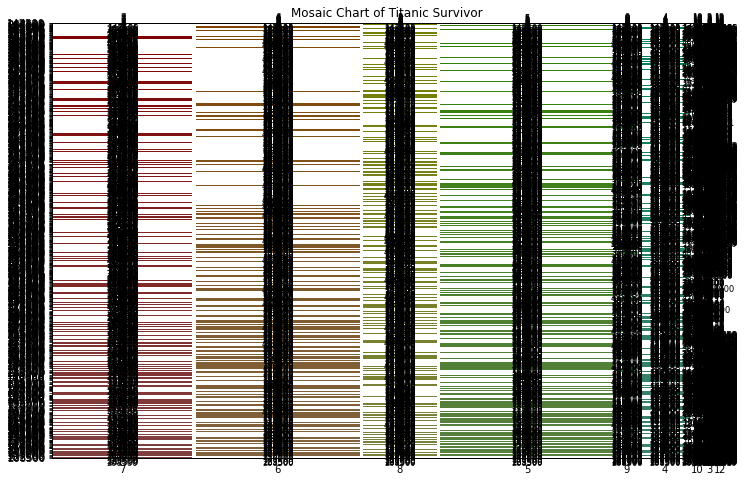

,OverallQual,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,GarageCars
0,7,2003,2003,0,2003.0,2
1,6,1976,1976,1,1976.0,2
2,7,2001,2002,1,2001.0,2
3,7,1915,1970,1,1998.0,3
4,8,2000,2000,1,2000.0,3
...,...,...,...,...,...,...
1455,6,1999,2000,1,1999.0,2
1456,6,1978,1988,2,1978.0,2
1457,7,1941,2006,2,1941.0,1
1458,5,1950,1996,0,1950.0,1


In [33]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
mosaic(train, ['OverallQual', 'SalePrice'], title='Mosaic Chart of Titanic Survivor')
plt.show()




In [9]:
train_corr = train.corr()
import seaborn as sns
import matplotlib.pyplot as plt

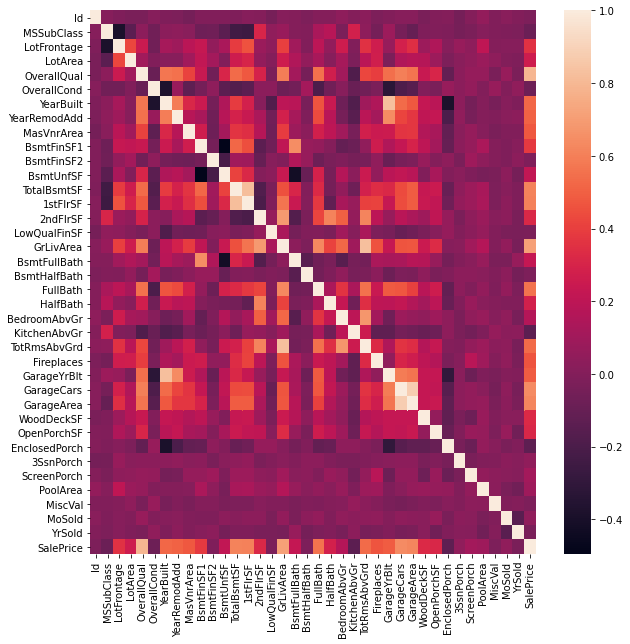

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(train_corr)

In [11]:
# Salesprice 컬럼과 상관 계수가 0.5보다 큰 대상에 대해서만 출력
rev = train_corr.SalePrice[abs(train_corr.SalePrice) > 0.5]
rev
rev_cols = list(rev.index.values)
rev_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

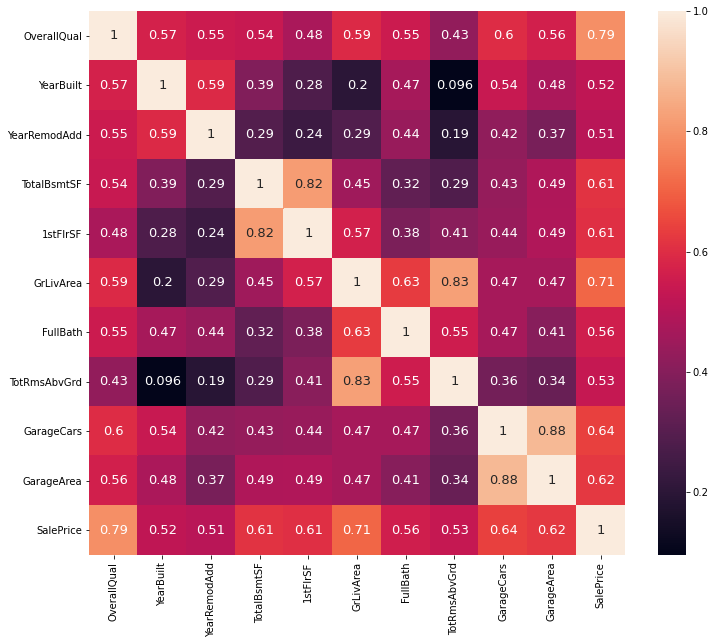

In [12]:
corr2 = train[rev_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr2,annot=True, annot_kws={'size':13})